In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 


In [3]:
#display(data)
def filter_data(data):
    
    max_flux = 12
    min_flux = 26
    data = data[data['flux_aper']>max_flux]
    #data = data[data['flux_aper']<min_flux]
    #data = data[data['flux_aper_lolim']<min_flux]
    #data = data[data['flux_aper_hilim']>(max_flux-2)]
    data = data[data['significance']>2]
    data = data.sample(frac=1)
    #display(data.describe())
    data_class = data[['class']]
    #data_id = data['src_id']
    #data_name = data['src_name']
    data_sig = data['significance']
    obs_info_params = [ 'livetime','significance','likelihood','pileup_flag','mstr_sat_src_flag','mstr_streak_src_flag'   ,'gti_obs' , 'flux_significance_b'  , 'flux_significance_m' , 'flux_significance_s' , 'flux_significance_h' , 'flux_significance_u'    ]
    data_val = data.drop(columns=obs_info_params)
    flux_params = ['photflux_aper' ,'photflux_aper_lolim' , 'photflux_aper_hilim' , 'flux_aper' , 'flux_aper_lolim' , 'flux_aper_hilim' ]
    flux_params_band = []
    filters = ['_b' ,'_h' ,'_m' ,'_u' ,'_s']
    for fp in flux_params:
        for f in filters:
            temp = fp+f
            flux_params_band.append(temp)

    data_val = data_val.drop(columns=['index' , 'class'])
    display(data_val)
    import missingno as msno
    msno.matrix(data_val)
    plt.show()

    data_val = data_val.replace(np.nan , 0)
    msno.matrix(data_val)
    plt.show()
    for d in data_val:
        mean = np.mean(data_val[d])
        var = np.var(data_val[d])
        data_val[d] = (data_val[d]-mean)/var
        data_val[d] = data_val[d] / np.amax(data_val[d])
    #data_val = data_val.replace(np.nan , 0)
    #msno.matrix(data_val)
    #plt.show()
    return data , data_val , data_class , data_sig 

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,flux_brems,flux_brems_lolim,flux_brems_hilim,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
108,13.547447,13.922632,14.778847,12.866781,12.834756,15.160271,NaN,NaN,13.271727,13.212115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,15.188693,NaN,15.150274,NaN,14.990124,16.015698,NaN,15.886391,NaN,15.600326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,13.328457,13.917574,13.057793,12.383524,12.271890,13.352128,14.047837,13.076238,12.401100,12.282996,...,4.661000e-13,4.586000e-13,4.735000e-13,12.49,14.7,11.08,23.57,24.77,22.41,1.055
155,14.879755,NaN,14.631527,13.326334,13.315334,NaN,NaN,NaN,14.033155,13.972243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,14.732359,15.181708,14.924818,14.864867,14.442493,15.009972,NaN,15.290645,15.582528,14.660747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,15.290306,14.027519,15.103253,13.574629,13.587204,NaN,NaN,NaN,13.869666,13.865504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,15.250728,NaN,15.758952,15.096205,15.212610,15.834162,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,15.801618,14.597739,15.638272,13.601539,13.612077,NaN,NaN,NaN,13.856049,13.866461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,14.841939,NaN,14.813044,14.743523,14.432268,15.427012,NaN,15.503347,NaN,14.851397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


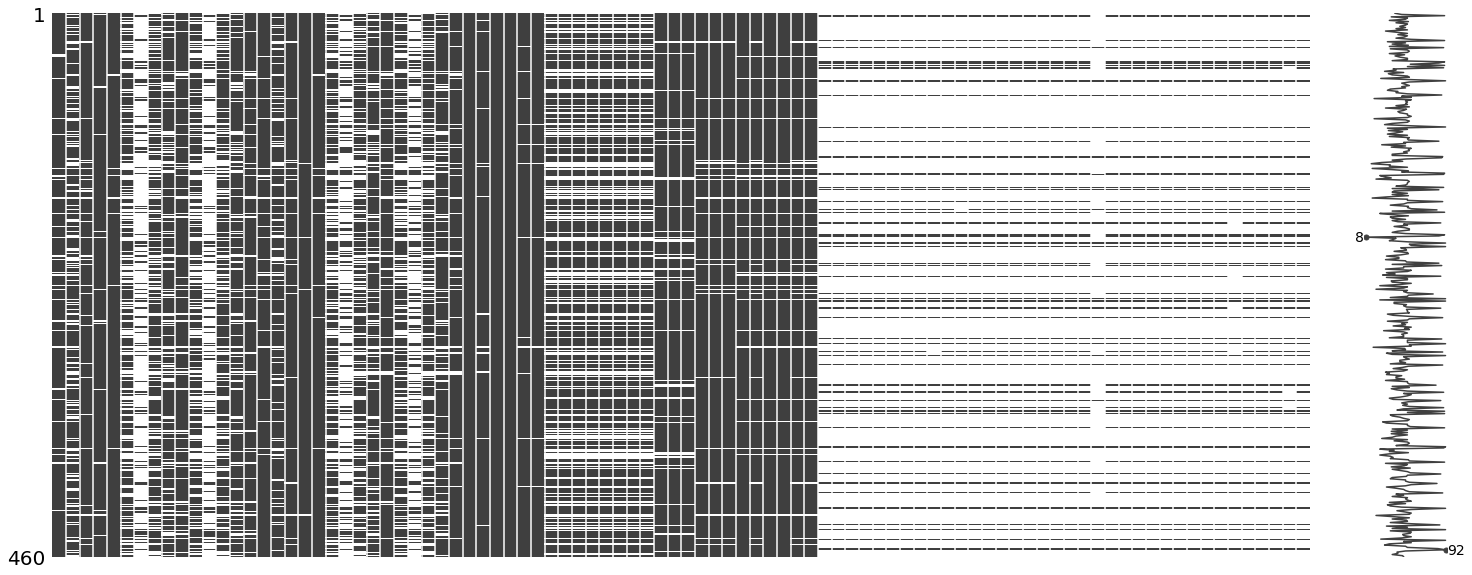

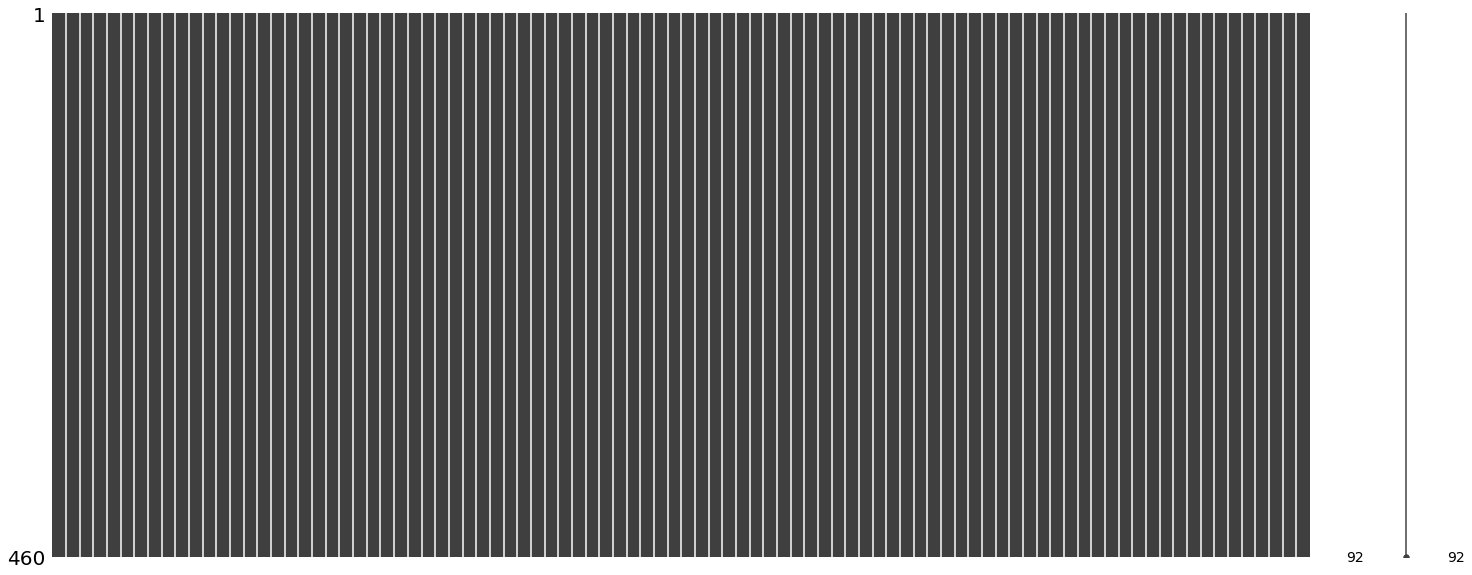

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,flux_brems,flux_brems_lolim,flux_brems_hilim,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
count,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,...,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02,4.600000e+02
mean,-6.057956e-16,1.793734e-15,-1.179491e-15,-6.107433e-16,5.695927e-17,-7.286442e-16,-4.766718e-17,-8.051530e-16,1.570966e-15,1.294858e-15,...,-1.338000e-17,1.242967e-17,-1.448117e-18,4.729007e-18,4.314182e-18,1.708326e-18,-1.706817e-17,1.710588e-17,-5.694418e-18,-6.833302e-18
std,1.372770e+00,1.101821e+00,1.287806e+00,9.676442e-01,7.793372e-01,9.026102e-01,3.843886e-01,9.819147e-01,1.044331e+00,1.082349e+00,...,1.118785e-01,1.079702e-01,1.133446e-01,8.607818e-02,7.960290e-02,5.321113e-02,7.605041e-02,8.167937e-02,6.927863e-02,6.774284e-02
min,-4.991325e+00,-1.856687e+00,-4.942026e+00,-5.352283e+00,-5.659927e+00,-1.197969e+00,-1.729997e-01,-1.464663e+00,-1.946756e+00,-3.005873e+00,...,-2.433519e-02,-2.317388e-02,-2.486293e-02,-1.122055e-02,-1.610919e-02,-7.000307e-03,-1.162362e-02,-1.240978e-02,-1.039324e-02,-1.779093e-02
25%,7.986567e-02,-1.856687e+00,7.519473e-02,-8.387474e-02,-1.468261e-01,-1.197969e+00,-1.729997e-01,-1.464663e+00,2.542181e-01,1.440040e-01,...,-2.433519e-02,-2.317388e-02,-2.486293e-02,-1.122055e-02,-1.610919e-02,-7.000307e-03,-1.162362e-02,-1.240978e-02,-1.039324e-02,-1.779093e-02
50%,3.909197e-01,5.214585e-01,3.512119e-01,1.147017e-01,8.188592e-02,5.630464e-01,-1.729997e-01,5.573811e-01,4.716370e-01,3.443364e-01,...,-2.433519e-02,-2.317388e-02,-2.486293e-02,-1.122055e-02,-1.610919e-02,-7.000307e-03,-1.162362e-02,-1.240978e-02,-1.039324e-02,-1.779093e-02
75%,5.449640e-01,7.344786e-01,5.151201e-01,3.808767e-01,3.344214e-01,7.140720e-01,-1.729997e-01,7.156401e-01,6.288316e-01,5.177566e-01,...,-2.433519e-02,-2.317388e-02,-2.486293e-02,-1.122055e-02,-1.610919e-02,-7.000307e-03,-1.162362e-02,-1.240978e-02,-1.039324e-02,-1.779093e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
train_bh = pd.read_csv('processed_data/BH_.csv')
train_bh = train_bh.sample(frac=1)
#display(data_bh)
#display(train_bh.describe())
train_ns = pd.read_csv('processed_data/NS_.csv')
train_ns = train_ns.sample(frac=1)
#display(data_ns)
#display(train_ns.describe())



train = pd.concat([train_bh , train_ns ] , axis=0)
train =  train.sample(frac=1)

train_data ,  data_val , data_class , data_sig = filter_data(train)
display(data_val.describe())

In [5]:
train_data[['flux_aper_hilim' , 'flux_aper_lolim' ,'flux_aper']].describe()

,flux_aper_hilim,flux_aper_lolim,flux_aper
count,460.000000,447.000000,460.000000
mean,13.980383,14.562122,14.269228
std,0.752165,1.041410,0.860268
min,11.886136,12.022661,12.009448
25%,13.435987,13.877423,13.713923
50%,13.943529,14.524590,14.251757
75%,14.533629,15.231485,14.864926
max,16.031949,17.980053,16.724746


In [6]:
data_bh_clean = train_data[data_class['class']=='BH']
display(data_bh_clean.describe())
data_ns_clean = train_data[data_class['class']=='NS']
display(data_ns_clean.describe())

,index,livetime,significance,likelihood,flux_significance_b,flux_significance_m,flux_significance_s,flux_significance_h,flux_significance_u,flux_aper_hilim_s,...,flux_brems,flux_brems_lolim,flux_brems_hilim,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
count,158.000000,158.000000,158.000000,158.000000,158.000000,153.000000,158.000000,157.000000,143.000000,156.000000,...,2.200000e+01,2.200000e+01,2.200000e+01,22.000000,21.000000,22.000000,2.200000e+01,22.000000,21.000000,22.000000
mean,98.886076,64967.070886,106.945253,130855.358683,6.539241,3.540915,3.314430,3.718471,1.060979,14.963803,...,1.990322e-13,1.823029e-13,2.095841e-13,8.142182,5.710286,6.556545,1.889131e+02,225.026805,167.025393,1.175773
std,51.732651,55595.789923,143.807171,206458.657351,7.427473,4.571483,4.240159,4.970062,1.622928,0.581437,...,3.472688e-13,3.154932e-13,3.624251e-13,20.606303,5.071707,16.774386,3.693066e+02,423.254418,334.132431,0.958295
min,0.000000,4256.000000,2.110000,11.367330,0.000000,0.000000,0.000000,0.000000,0.000000,13.119529,...,5.233000e-15,4.422000e-15,5.843000e-15,1.526000,1.745000,1.160000,3.984000e-07,0.648700,0.083260,0.417000
25%,59.500000,24789.100000,13.890000,1205.131000,2.655000,1.050000,0.000000,1.320000,0.000000,14.770756,...,4.396750e-14,3.822000e-14,4.773000e-14,2.414250,3.134000,1.986500,7.482750e+00,10.358250,5.142000,0.863750
50%,99.500000,42241.700000,17.390000,1313.561000,4.270000,2.230000,2.575000,2.210000,1.000000,14.974925,...,8.793000e-14,8.155000e-14,9.316000e-14,3.587000,4.313000,2.749500,3.941000e+01,43.810000,42.200000,1.014500
75%,138.750000,78119.475000,337.000000,462011.400000,6.880000,4.260000,4.130000,4.000000,1.530000,15.322732,...,2.120000e-13,1.988500e-13,2.218000e-13,4.682000,5.718000,3.780750,7.555250e+01,88.902500,66.640000,1.099750
max,198.000000,184208.000000,337.000000,462011.400000,42.160000,25.080000,24.630000,34.750000,8.750000,16.072527,...,1.639000e-12,1.477000e-12,1.713000e-12,100.000000,24.980000,81.320000,1.472000e+03,1571.000000,1380.000000,5.352000


,index,livetime,significance,likelihood,flux_significance_b,flux_significance_m,flux_significance_s,flux_significance_h,flux_significance_u,flux_aper_hilim_s,...,flux_brems,flux_brems_lolim,flux_brems_hilim,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
count,302.000000,302.000000,302.000000,3.020000e+02,294.000000,286.000000,278.000000,299.000000,237.000000,273.000000,...,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,32.000000,35.0000,3.500000e+01,35.000000,33.000000,35.000000
mean,244.188742,20936.572848,51.707550,inf,5.933980,3.394615,3.141547,3.188462,0.631772,14.475755,...,3.975766e-13,3.697231e-13,4.185837e-13,9.465431,4.393156,3.3085,1.035446e+02,134.359143,91.582818,1.345571
std,118.901537,22797.807709,81.210398,inf,9.761138,5.783595,5.953808,5.505631,1.591595,0.858107,...,4.580956e-13,4.388780e-13,4.750934e-13,24.443143,7.880175,6.3811,2.254279e+02,318.601169,185.965887,1.392514
min,7.000000,977.000000,2.320000,1.257282e+01,0.000000,0.000000,0.000000,0.000000,0.000000,12.380594,...,2.791000e-14,2.034000e-14,3.006000e-14,0.322000,0.357500,0.2897,3.142000e-07,11.910000,6.983000,0.539000
25%,145.750000,4118.050000,6.770000,1.627296e+02,1.350000,0.000000,0.000000,1.090000,0.000000,13.842846,...,6.964000e-14,5.798000e-14,7.826000e-14,0.656250,0.718125,0.5818,2.594000e+01,35.350000,22.440000,0.813500
50%,231.500000,13822.450000,23.470000,1.934920e+03,3.260000,1.785000,1.370000,1.950000,0.000000,14.514137,...,2.183000e-13,2.015000e-13,2.335000e-13,0.980000,1.120000,0.7764,3.967000e+01,44.480000,36.520000,1.055000
75%,352.750000,29751.125000,49.260000,9.049175e+03,5.812500,3.865000,2.852500,3.685000,1.000000,15.105684,...,5.266500e-13,5.131500e-13,5.365500e-13,4.425000,3.107000,3.2190,5.623000e+01,78.750000,47.660000,1.521000
max,439.000000,166689.200000,376.060000,1.797693e+308,78.980000,47.200000,49.460000,63.410000,12.540000,16.403623,...,1.674000e-12,1.627000e-12,1.726000e-12,100.000000,35.720000,32.5400,1.070000e+03,1712.000000,800.600000,9.074000


In [7]:
def split_data(x,y,s,frac):
    split_no = int(len(y)*frac )
    x_train = x[:split_no]
    x_test = x[split_no:]
    y_train = y[:split_no]
    y_test = y[split_no:]
    s_train = s[:split_no]
    s_test = s[split_no:]
    #id_train = id[:split_no]
    #id_test = id[split_no:]
    return (x_train , y_train , s_train ,) , (x_test , y_test , s_test , )

x = data_val.to_numpy()
y = data_class.to_numpy()
s = data_sig.to_numpy()
s = s
#s = [float(si) for si in s]
(x_train , y_train , s_train , ) , (x_test , y_test , s_test , ) =  split_data(x, y,s , 1)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(460, 92) (460, 1)
(0, 92) (0, 1)


# Neural Network

In [8]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        for j in range(len(cl)):
            if(label[i]==cl[j]):
                temp.append(j) 
    return temp
classes = ['BH' ,'NS' ]
y_train_int = class_to_int(y_train, classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_y_train =  to_categorical(y_train_int)
#one_hot_y_test =  to_categorical(y_test_int)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

In [9]:
desc_class = pd.DataFrame()
y_class_ser = (np.asarray(y_train).reshape(len(y_train)))
desc_class.insert(0, 'cl', y_class_ser)
ns_n = desc_class.value_counts()['NS']
bh_n= desc_class.value_counts()['BH']
print(ns_n , bh_n)

302 158


In [10]:

def model_gen(shape , input_len):

    inputs =  keras.Input(shape=(input_len,))
    dense =  layers.Dense(32, activation='relu')
    x = dense(inputs)
    #x =  layers.BatchNormalization(axis=-1)(x)
    
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    x = layers.Dense(16, activation='relu')(x)
    #x = layers.Dense(4, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(2 , activation='softmax')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.0005),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([32,32,16,8] , x_train.shape[1])
class_weight = {0: (ns_n/(ns_n+bh_n)),
                1: (bh_n/(ns_n+bh_n))}
history = model.fit(x_train, one_hot_y_train, batch_size=32, epochs=70, validation_split=0.2 , class_weight=class_weight , sample_weight=s_train)


2021-10-06 13:44:53.302077: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-06 13:44:53.302375: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-06 13:44:53.302789: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-10-06 13:44:53.469024: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-06 13:44:53.486349: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


Epoch 1/70
12/12 [==============================] - 1s 66ms/step - loss: 23.5730 - accuracy: 0.3335 - val_loss: 47.3329 - val_accuracy: 0.3478
Epoch 2/70
12/12 [==============================] - 0s 17ms/step - loss: 24.2696 - accuracy: 0.3648 - val_loss: 45.4274 - val_accuracy: 0.3913
Epoch 3/70
12/12 [==============================] - 0s 17ms/step - loss: 21.3655 - accuracy: 0.3540 - val_loss: 44.3222 - val_accuracy: 0.4457
Epoch 4/70
12/12 [==============================] - 0s 24ms/step - loss: 21.0924 - accuracy: 0.4407 - val_loss: 44.3988 - val_accuracy: 0.4674
Epoch 5/70
12/12 [==============================] - 0s 13ms/step - loss: 16.7525 - accuracy: 0.4803 - val_loss: 43.1144 - val_accuracy: 0.5109
Epoch 6/70
12/12 [==============================] - 0s 22ms/step - loss: 16.7804 - accuracy: 0.5058 - val_loss: 40.4698 - val_accuracy: 0.5326
Epoch 7/70
12/12 [==============================] - 0s 24ms/step - loss: 15.7191 - accuracy: 0.5812 - val_loss: 40.2026 - val_accuracy: 0.5217

In [11]:

def model_gen(shape , input_len):

    inputs =  keras.Input(shape=(input_len,))
    dense =  layers.Dense(32, activation='relu')
    x = dense(inputs)
    #x =  layers.BatchNormalization(axis=-1)(x)
    
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    #x = layers.Dense(16, activation='relu')(x)
    #x = layers.Dense(4, activation='relu')(x)
    #x =  layers.BatchNormalization(axis=-1)(x)
    #x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(2 , activation='softmax')(x)
    model = keras.Model(inputs=inputs , outputs=outputs , name='trial_model')
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.0005),
        metrics = ["accuracy"],
    )
    return model
model = model_gen([32,32,16,8] , x_train.shape[1])

history = model.fit(x_train, one_hot_y_train, batch_size=64, epochs=100, validation_split=0.2  , sample_weight=s_train*5)


Epoch 1/100
6/6 [==============================] - 2s 75ms/step - loss: 255.4176 - accuracy: 0.3332 - val_loss: 214.9797 - val_accuracy: 0.3587
Epoch 2/100
6/6 [==============================] - 0s 55ms/step - loss: 238.4286 - accuracy: 0.3587 - val_loss: 211.8992 - val_accuracy: 0.4348
Epoch 3/100
6/6 [==============================] - 0s 43ms/step - loss: 229.3247 - accuracy: 0.4729 - val_loss: 208.2270 - val_accuracy: 0.4674
Epoch 4/100
6/6 [==============================] - 0s 42ms/step - loss: 221.6233 - accuracy: 0.5119 - val_loss: 204.0593 - val_accuracy: 0.4891
Epoch 5/100
6/6 [==============================] - 0s 36ms/step - loss: 230.1862 - accuracy: 0.5081 - val_loss: 200.3917 - val_accuracy: 0.5109
Epoch 6/100
6/6 [==============================] - 0s 51ms/step - loss: 209.2233 - accuracy: 0.5493 - val_loss: 197.0355 - val_accuracy: 0.5326
Epoch 7/100
6/6 [==============================] - 0s 49ms/step - loss: 185.0717 - accuracy: 0.5547 - val_loss: 192.3894 - val_accuracy:

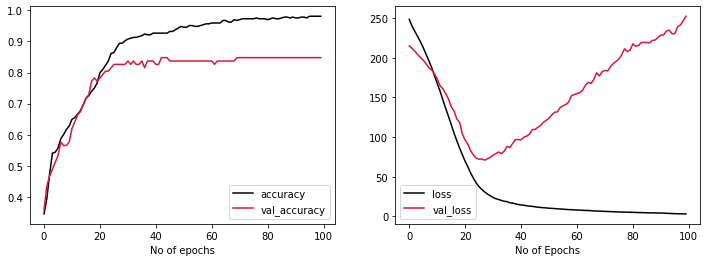

In [12]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
#plt.savefig('plots/NS_BH.png')
plt.show()

## Convolution Neural Network

In [35]:
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers.convolutional import Conv2D
#from tensorflow.keras.layers.pooling import MaxPooling2D
visible = layers.Input(shape=(92,1))
#x = layers.BatchNormalization(axis=-1)(visible)
#x = tf.keras.layers.LeakyReLU(alpha=0.3)(visible)
x = layers.Conv1D(32, kernel_size=4, activation='relu' , kernel_regularizer= 'l2')(visible)
x = layers.MaxPool1D(pool_size=(2))(x)

x = layers.Conv1D(32, kernel_size=4, activation='relu' ,   kernel_regularizer= 'l2')(x)
x = layers.MaxPool1D(pool_size=(2))(x)
x = layers.Conv1D(16, kernel_size=4, activation='relu' , kernel_regularizer= 'l2')(x)
x = layers.MaxPooling1D(pool_size=(2))(x)
#x = layers.Conv1D(32, kernel_size=4, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=(2))(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu' ,  kernel_regularizer= 'l2')(x)
#x = layers.Dense(10, activation='relu')(x)
output = layers.Dense(2, activation='sigmoid' , kernel_regularizer= 'l2')(x)
model_cnn = keras.Model(inputs=visible, outputs=output)
# summarize layers
#print(model_cnn.summary())
model_cnn.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.0005),
        metrics = ["accuracy"], 
    )
history = model_cnn.fit(x_train, one_hot_y_train, batch_size=128, epochs=120, validation_split=0.3)

Epoch 1/120
3/3 [==============================] - 3s 379ms/step - loss: 1.5373 - accuracy: 0.3240 - val_loss: 1.5135 - val_accuracy: 0.4275
Epoch 2/120
3/3 [==============================] - 0s 148ms/step - loss: 1.5054 - accuracy: 0.5660 - val_loss: 1.4823 - val_accuracy: 0.6377
Epoch 3/120
3/3 [==============================] - 0s 119ms/step - loss: 1.4759 - accuracy: 0.6507 - val_loss: 1.4518 - val_accuracy: 0.6812
Epoch 4/120
3/3 [==============================] - 1s 228ms/step - loss: 1.4474 - accuracy: 0.6642 - val_loss: 1.4248 - val_accuracy: 0.6667
Epoch 5/120
3/3 [==============================] - 0s 150ms/step - loss: 1.4209 - accuracy: 0.6610 - val_loss: 1.3999 - val_accuracy: 0.6667
Epoch 6/120
3/3 [==============================] - 0s 113ms/step - loss: 1.4059 - accuracy: 0.6278 - val_loss: 1.3765 - val_accuracy: 0.6667
Epoch 7/120
3/3 [==============================] - 0s 109ms/step - loss: 1.3738 - accuracy: 0.6698 - val_loss: 1.3546 - val_accuracy: 0.6667
Epoch 8/120
3

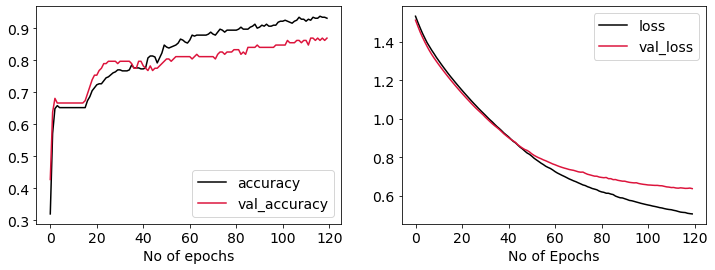

In [36]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
#plt.savefig('plots/NS_BH.png')
plt.show()

In [15]:
#model.save('models/NN_NS_BH.mdl')
#np.save('test_data/NN_NS_BH.cv' , x_test)
#np.save('test_data/NN_NS_BH_label.cv' , one_hot_y_test)

In [16]:
import seaborn as sns

In [17]:
%reload_ext autoreload

In [18]:
%autoreload 2
#from my_utils.score import test_func , conf_matrix
from my_utils.print_lines import *

In [19]:
font = {'size'   : 14}
plt.rc('font', **font)

In [20]:
def conf_matrix(model ,x, oh_yt , plot=0):
    '''
    return confusion matrix
    Parameters :
        model -  Keras model
        x - test/training data
        oh_yt =  one hot encoded test labels
    '''
    y_pred_prob = model.predict(x)
    #y_pred=  [np.argmax(yi) for yi in y_pred]
    y_pred = []
    for yi in y_pred_prob:
        temp = [0]*len(yi)
        temp[np.argmax(yi)] = 1
        y_pred.append(temp)
    y_pred =  np.asarray(y_pred)
    #print(y)
    cf = np.matmul(oh_yt.T , y_pred)
    return cf

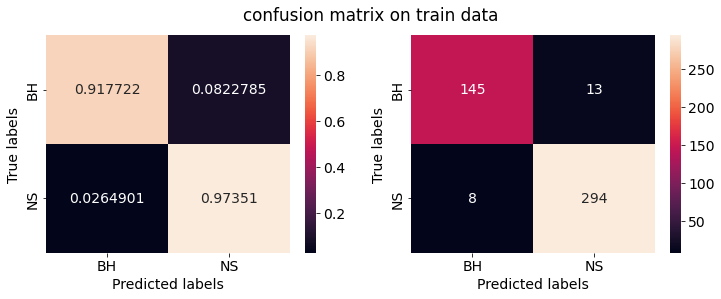

In [21]:
cf = conf_matrix(model , x_train, one_hot_y_train)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels'); 
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']); 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on train data')
#plt.savefig('plots/cf_ns_bh_test.jpg')
plt.show()
plt.close()

## TEST

In [22]:
test_bh = pd.read_csv('processed_data/BH_test.csv')
display(test_bh.describe())
test_ns = pd.read_csv('processed_data/NS_test.csv')
test_pulsar = pd.read_csv('processed_data/PULSAR.csv')
test_cv = pd.read_csv('processed_data/CV.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test = test.sample(frac=1)
test_data , t_val , t_class , t_id , t_sig = filter_data(test)


t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)

FileNotFoundError: [Errno 2] No such file or directory: 'processed_data/BH_test.csv'

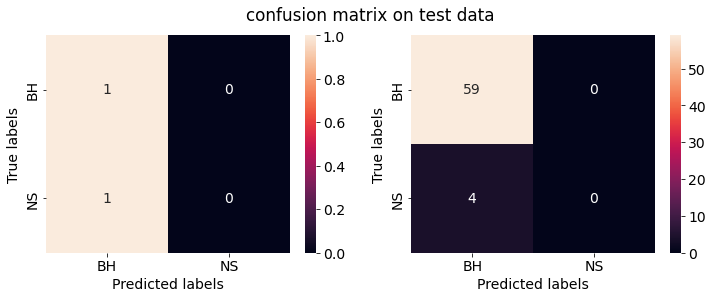

In [ ]:
cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
#plt.savefig('plots/cf_ns_bh_test.jpg')
plt.show()
plt.close()

In [ ]:
y_test_pred_prob =  model.predict(x_test)
y_test_pred = []
for yi in y_test_pred_prob:
    temp = [0]*len(yi)
    temp[np.argmax(yi)] = 1
    y_test_pred.append(temp)
y_test_pred =  np.asarray(y_test_pred)
miss_cl_data = pd.DataFrame()
missed_src = []
for yp , yh , si ,  y_prob in zip(y_test_pred , one_hot_y_test , t_id , y_test_pred_prob):
    chk = np.dot(yp,yh)
    if(chk<1):
        #print(y_prob,  si)
        data_sneak = test[test['src_id'] == si]
        display(data_sneak)
        miss_cl_data = miss_cl_data.append(data_sneak)
        missed_src.append(si)
miss_src_cnt =  pd.DataFrame()
miss_src_cnt.insert(0,'src' ,missed_src)
miss_src_cnt = miss_src_cnt['src'].value_counts()
display(miss_src_cnt)
display(miss_cl_data)
#missed_src_count = missed_src.count_val()

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
2,1,NS,NS0045,XMMU J004245.2+41172,4892.8,2.7,32.14374,2000-07-29T00:48:01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,NS,NS0045,XMMU J004245.2+41172,3952.1,2.7,32.14374,2006-05-26T04:29:15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,NS,NS0045,XMMU J004245.2+41172,3945.4,2.7,32.14374,2004-05-23T17:57:37,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,NS,NS0045,XMMU J004245.2+41172,4903.3,2.7,32.14374,2001-06-10T19:55:55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,NS,NS0045,XMMU J004245.2+41172,7699.2,2.7,32.14374,2007-06-02T22:33:55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6,NS,NS0045,XMMU J004245.2+41172,4106.7,2.7,32.14374,2006-06-09T16:34:28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NS,NS0045,XMMU J004245.2+41172,5089.9,2.7,32.14374,2000-06-01T01:40:30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
8,0,NS,NS0049,XTE J1709-267,5133.6,212.84,299603.9,2002-04-23T21:55:11,0.005467,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2,NS,NS0049,XTE J1709-267,22746.0,212.84,299603.9,2003-05-12T07:58:23,0.005467,1.0,...,13.439257,13.258533,1.249,0.7764,33.12,13.44,0.4010,0.3383,7.73700,NaN
9,1,NS,NS0049,XTE J1709-267,9914.0,212.84,299603.9,2008-07-16T18:06:09,0.005467,1.0,...,10.069968,10.065148,16.370,14.7100,32.17,30.83,0.8897,0.8866,0.01984,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
0,0,NS,NS0006,1H 1715-321,19923.7,2.32,24.6439,2005-07-16T14:46:56,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
8,0,NS,NS0049,XTE J1709-267,5133.6,212.84,299603.9,2002-04-23T21:55:11,0.005467,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2,NS,NS0049,XTE J1709-267,22746.0,212.84,299603.9,2003-05-12T07:58:23,0.005467,1.0,...,13.439257,13.258533,1.249,0.7764,33.12,13.44,0.4010,0.3383,7.73700,NaN
9,1,NS,NS0049,XTE J1709-267,9914.0,212.84,299603.9,2008-07-16T18:06:09,0.005467,1.0,...,10.069968,10.065148,16.370,14.7100,32.17,30.83,0.8897,0.8866,0.01984,NaN


NS0049    2
NS0045    1
NS0006    1
Name: src, dtype: int64

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
2,1,NS,NS0045,XMMU J004245.2+41172,4892.8,2.70,32.14374,2000-07-29T00:48:01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,NS,NS0045,XMMU J004245.2+41172,3952.1,2.70,32.14374,2006-05-26T04:29:15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,NS,NS0045,XMMU J004245.2+41172,3945.4,2.70,32.14374,2004-05-23T17:57:37,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,NS,NS0045,XMMU J004245.2+41172,4903.3,2.70,32.14374,2001-06-10T19:55:55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,NS,NS0045,XMMU J004245.2+41172,7699.2,2.70,32.14374,2007-06-02T22:33:55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6,NS,NS0045,XMMU J004245.2+41172,4106.7,2.70,32.14374,2006-06-09T16:34:28,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NS,NS0045,XMMU J004245.2+41172,5089.9,2.70,32.14374,2000-06-01T01:40:30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,NS,NS0049,XTE J1709-267,5133.6,212.84,299603.90000,2002-04-23T21:55:11,0.005467,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2,NS,NS0049,XTE J1709-267,22746.0,212.84,299603.90000,2003-05-12T07:58:23,0.005467,1.0,...,13.439257,13.258533,1.249,0.7764,33.12,13.44,0.4010,0.3383,7.73700,NaN
9,1,NS,NS0049,XTE J1709-267,9914.0,212.84,299603.90000,2008-07-16T18:06:09,0.005467,1.0,...,10.069968,10.065148,16.370,14.7100,32.17,30.83,0.8897,0.8866,0.01984,NaN


In [ ]:
data_sneak = test[test['src_id'] == 'NS0061']
display(data_sneak)

,index,class,src_id,src_name,livetime,significance,likelihood,gti_obs,var_inter_sigma,var_inter_prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
